### Confidence Intervals - Part I

First let's read in the necessary libraries and the dataset.  You also have the full and reduced versions of the data available.  The reduced version is an example of you would actually get in practice, as it is the sample.  While the full data is an example of everyone in your population.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

In [36]:
coffee_full[coffee_full['drinks_coffee'] == True]['height'].mean()

68.40021025548401

In [2]:
coffee_full.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [3]:
coffee_red['drinks_coffee'].mean() # Drink Coffee

0.595

In [4]:
1 - coffee_red['drinks_coffee'].mean() # Don't Drink Coffee

0.405

`2.` Of the individuals who do not drink coffee, what is the average height?

In [5]:
coffee_red[coffee_red['drinks_coffee'] == False]['height'].mean()

66.78492279927877

`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [6]:
bootsamp = coffee_red.sample(200, replace = True)

In [7]:
bootsamp['drinks_coffee'].mean() # Drink Coffee and 1 minus gives the don't drink

0.605

In [19]:
boot_test = []
for _ in range(5):
    bootsamp = coffee_red.sample(10,replace = True)
    print(bootsamp)
    
    boot_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    print(boot_mean)
    boot_test.append(boot_mean)
print(boot_test)

      user_id   age  drinks_coffee     height
1587     3561  >=21           True  69.874219
1208     3840  >=21           True  70.579154
2167     7441   <21          False  66.659561
944      4975  >=21          False  74.276003
1370     3295  >=21           True  68.308250
432      2799  >=21           True  67.731695
2478     2744  >=21           True  67.105035
557      6101   <21           True  64.054247
2679     6326  >=21          False  74.334307
32       4811  >=21           True  70.023295
71.75662360953045
      user_id   age  drinks_coffee     height
45       3411  >=21           True  69.140416
2515     6507  >=21           True  67.441772
2320     7755  >=21           True  68.194103
1105     6800   <21          False  61.683056
879      2639  >=21           True  68.445535
2799     3307   <21          False  65.099422
1543     3708   <21          False  66.322896
693      5355  >=21           True  67.067121
93       2423  >=21           True  69.540052
1110     4890  >

In [20]:
boot_test = []
for _ in range(5):
    bootsamp = coffee_red.sample(10,replace = False)
    print(bootsamp)
    
    boot_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    print(boot_mean)
    boot_test.append(boot_mean)
print(boot_test)

      user_id   age  drinks_coffee     height
1616     6004  >=21           True  73.331906
2232     3244  >=21           True  69.824271
1626     7249  >=21           True  69.694013
912      5499   <21          False  64.587150
1712     5437   <21           True  65.212567
1422     3971   <21          False  61.891849
1261     7880  >=21           True  69.372320
1084     5625  >=21           True  71.468978
174      8057   <21           True  63.285464
1237     2632  >=21           True  67.580916
63.239499253167686
      user_id   age  drinks_coffee     height
88       5398   <21          False  66.588175
2821     2654   <21          False  65.523358
32       4811  >=21           True  70.023295
535      5098  >=21           True  71.005715
432      2799  >=21           True  67.731695
318      3053   <21          False  64.035550
368      5182   <21           True  63.973306
1506     4383  >=21          False  67.960161
2226     5657  >=21           True  67.754660
1370     3295  

In [21]:
boot_test

[63.239499253167686,
 66.02681115665803,
 66.73808102430817,
 63.845412010064045,
 65.83976029934979]

`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample.  Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

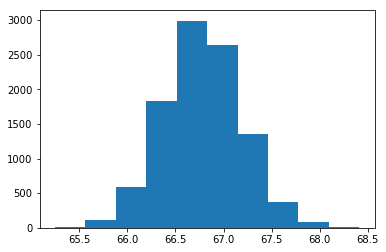

In [15]:
boot_means = []
for _ in range(10000):
    bootsamp = coffee_red.sample(200, replace = True)
    boot_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    boot_means.append(boot_mean)
    
plt.hist(boot_means); # Looks pretty normal

In [16]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(65.992913281575198, 67.584027382815734)

`5.`  Did your interval capture the actual average height of coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [17]:
coffee_full[coffee_full['drinks_coffee'] == False]['height'].mean() 

66.44340776214705

In [ ]:
# Captured by our interval, but not the exact same as the sample mean

In [ ]:
#

In [22]:
die_vals=np.array([1,2,3,4,5,6])


In [30]:
np.random.choice(die_vals,size=6,replace=False)

array([4, 6, 1, 5, 2, 3])

In [32]:
np.random.choice(die_vals,size=6,replace=True)

array([6, 5, 2, 6, 3, 1])

In [33]:
np.random.choice(die_vals,size=20,replace=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [34]:
np.random.choice(die_vals,size=20,replace=True)

array([3, 3, 4, 6, 4, 3, 1, 2, 2, 6, 5, 5, 2, 3, 3, 4, 6, 4, 5, 2])

In [42]:
###

In [47]:
coffee_full[coffee_full['drinks_coffee'] == True]['height'].mean()

68.40021025548401

In [48]:
boot_coff = []
for _ in range(10000):
    bootsamp = coffee_red.sample(200,replace = True)
    
    
    boot_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    
    boot_coff.append(boot_mean)


In [50]:
np.mean(boot_coff)

68.11858897121299

In [49]:
np.percentile(boot_coff, 2.5), np.percentile(boot_coff, 97.5)

(67.62395816309159, 68.58453514797709)

In [53]:
low,upper=np.percentile(boot_coff, 2.5), np.percentile(boot_coff, 97.5)

''

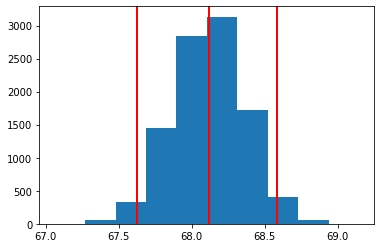

In [65]:
plt.hist(boot_coff)
plt.axvline(x=low,color='r',linewidth=2)
plt.axvline(x=np.mean(boot_coff),color='r',linewidth=2)
plt.axvline(x=upper,color='r',linewidth=2)
;

In [57]:
new_test=pd.DataFrame({'height_mean':boot_coff})

In [58]:
new_test.head()

,height_mean
0,67.879612
1,67.937454
2,67.916351
3,67.922142
4,68.118482


In [64]:
new_test.mean()

height_mean    68.118589
dtype: float64

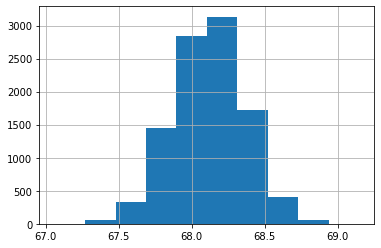

In [60]:
new_test.height_mean.hist()

In [ ]:
###

In [81]:
np.random.seed(42)
test=np.random.normal(size=10,loc=50,scale=1)
print(test)

[50.49671415 49.8617357  50.64768854 51.52302986 49.76584663 49.76586304
 51.57921282 50.76743473 49.53052561 50.54256004]


In [82]:
np.mean(test)

50.448061111698756